# Import Libraries

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import pandas as pd
from sklearn.metrics import accuracy_score

# Load pd_speech_features

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Read .csv file

In [3]:
pd_spf_data=pd.read_csv('/content/drive/MyDrive/pd_speech_features.csv')
#pd_spf_data.info()
#print 5 rows of the data set
pd_spf_data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
pd_spf_data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


# Process

In [5]:
pd_spf_data=pd_spf_data.rename(axis=1 ,mapper={"class":"target"})
pd_spf_data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,target
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
pd_spf_data.target

0      1
1      1
2      1
3      1
4      1
      ..
751    0
752    0
753    0
754    0
755    0
Name: target, Length: 756, dtype: int64

In [7]:
X = pd_spf_data.loc[:,(pd_spf_data.columns !="target")]
y = pd_spf_data.target
print(X)
print(y)

      id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0      0       1  0.85247  0.71826  0.57227        240               239   
1      0       1  0.76686  0.69481  0.53966        234               233   
2      0       1  0.85083  0.67604  0.58982        232               231   
3      1       0  0.41121  0.79672  0.59257        178               177   
4      1       0  0.32790  0.79782  0.53028        236               235   
..   ...     ...      ...      ...      ...        ...               ...   
751  250       0  0.80903  0.56355  0.28385        417               416   
752  250       0  0.16084  0.56499  0.59194        415               413   
753  251       0  0.88389  0.72335  0.46815        381               380   
754  251       0  0.83782  0.74890  0.49823        340               339   
755  251       0  0.81304  0.76471  0.46374        340               339   

     meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0            0.008064  

In [8]:
np.unique(y, return_counts=True)

(array([0, 1]), array([192, 564]))

# imbalanced-learn

In [9]:
!pip install imbalanced-learn

In [10]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state = 42)
X_over, y_over = oversample.fit_resample(X, y)
print('the shape of X: {}'.format(X_over.shape))
print('the shape of y: {}'.format(y_over.shape))

the shape of X: (1128, 754)
the shape of y: (1128,)


In [11]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([564, 564]))

# Normalize the dataset

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc=StandardScaler()
# sc=MinMaxScaler()
X_over = StandardScaler().fit_transform(X_over)
# X_over.shape

# Choosing the Optimum Number of PCs

##LDA

In [18]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
LDA = LDA()
X_LDA = LDA.fit_transform(X_over, y_over)

In [19]:
LDA_var_ratios = LDA.explained_variance_ratio_

In [20]:
def choose_n_components(var_ratio, goal_var: float) -> int:
    variance = 0
    n_components = 0
    for explained_variance in var_ratio:
        variance += explained_variance
        n_components += 1
        if variance>= goal_var:
           break

    return n_components #=> number of components

In [21]:
choose_n_components=choose_n_components(LDA_var_ratios, 0.95)
print(choose_n_components)

1


In [24]:
# LDA = LDA(choose_n_components=1)
X_LDA = LDA.fit_transform(X_over, y_over)
print(X_LDA.shape)
print(LDA.explained_variance_ratio_)

(1128, 1)
[1.]


##ICA

In [25]:
from sklearn.decomposition import FastICA

# Number of sources wanted.
ICA = FastICA(n_components=100, whiten=True, max_iter=1000)
X_ICA = ICA.fit_transform(X_over)
print(X_ICA.shape)
print(ICA.components_)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:708: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  return self._fit_transform(X, compute_sources=True)


(1128, 100)
[[-3.62724616e-04  4.30149717e-04 -3.26800660e-04 ...  2.15780443e-04
   2.11385978e-04 -2.45590699e-04]
 [-4.98040381e-04  1.58184093e-03  9.75976329e-05 ...  1.25969031e-04
   3.94170542e-04 -1.34881389e-04]
 [ 9.90288215e-04 -5.26710240e-04  1.86634220e-05 ... -7.13933046e-04
  -8.23582056e-04 -5.27742900e-04]
 ...
 [ 6.74637770e-04 -2.57218551e-05 -1.08511794e-03 ... -1.44535286e-04
   7.47431997e-05  5.23329252e-05]
 [ 1.11544922e-04  5.02197767e-04 -7.05514351e-04 ...  1.18683891e-03
   1.21044380e-03  7.38557437e-04]
 [-1.80991960e-03 -3.94333901e-04 -7.41756800e-06 ... -7.02032752e-04
  -5.62386282e-04  4.53159380e-05]]


# PCA

In [26]:
from sklearn.decomposition import PCA
pca = PCA()
X_new=pca.fit_transform(X_over)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.90) + 1
print(d)

109


##PCA with Whitening = pca_w_w

In [27]:
pca_w_w = PCA(svd_solver="full", n_components="mle",whiten=True)
X_pca_Whitening=pca_w_w.fit_transform(X_over)
n_components_pca_mle = pca_w_w.n_components_
print(n_components_pca_mle)


750


<Figure size 640x480 with 0 Axes>

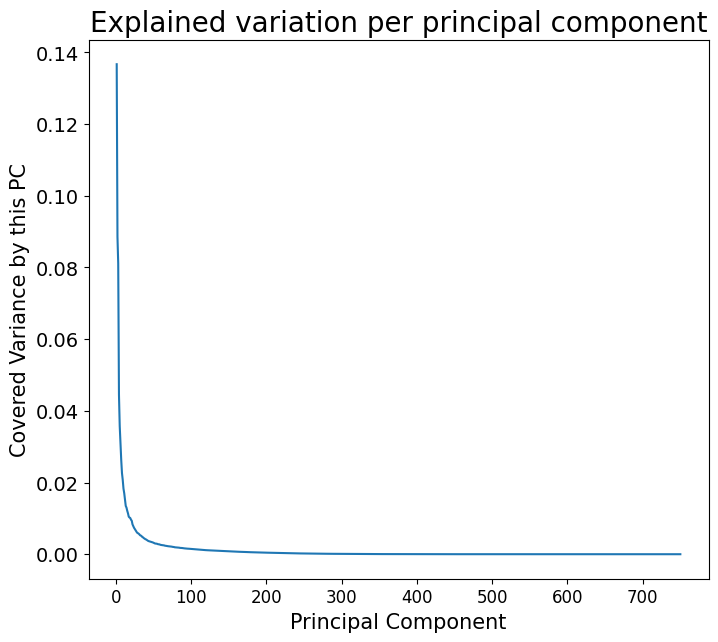

Explained variation per principal component for the first two PCs: [0.13669964 0.08856278]


In [28]:
xs = np.array(range(1,751))
plt.figure()
plt.figure(figsize=(8,7))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.plot(xs, pca_w_w.explained_variance_ratio_)
plt.xlabel('Principal Component',fontsize=15)
plt.ylabel('Covered Variance by this PC',fontsize=15)
plt.title("Explained variation per principal component",fontsize=20)
plt.show()
print('Explained variation per principal component for the first two PCs: {}'.format(pca_w_w.explained_variance_ratio_[0:2]))

In [29]:
pca_w_w = PCA(n_components=109 ,whiten=True)
X_pca_w_w=pca_w_w.fit_transform(X_over)

In [30]:
pca_w_w_var=pca_w_w.explained_variance_ratio_
print(pca_w_w_var)

[0.13669964 0.08856278 0.08112115 0.04446945 0.0357709  0.0310611
 0.02630341 0.02263305 0.02074146 0.01830794 0.01700249 0.01527477
 0.01348382 0.01299631 0.01210846 0.01139633 0.01047362 0.0102404
 0.0101046  0.00963099 0.00933301 0.00832209 0.00786521 0.00738605
 0.00703988 0.00664644 0.00638917 0.00603551 0.00590199 0.00575278
 0.00556207 0.00530168 0.00520677 0.00505478 0.0048114  0.00470586
 0.00448344 0.00436162 0.00419905 0.00411936 0.00397564 0.00380248
 0.00368766 0.00362012 0.00355616 0.00345463 0.0034003  0.00333327
 0.00328799 0.00318106 0.00309046 0.0029903  0.00296757 0.00294074
 0.00288136 0.00278883 0.00275252 0.00273573 0.00262355 0.00256988
 0.00254737 0.0025266  0.00247997 0.00246021 0.00238159 0.00236321
 0.00231531 0.0022685  0.00223953 0.00221514 0.00215829 0.00214504
 0.00214132 0.00211238 0.00205313 0.00201929 0.00200889 0.00192708
 0.00191226 0.00190139 0.00186206 0.00185448 0.00183638 0.00182095
 0.00175257 0.00174906 0.00174261 0.00170444 0.00167199 0.001652

In [31]:
print(abs( pca_w_w.components_ ))

[[0.0061474  0.05476835 0.0199024  ... 0.01730166 0.02266793 0.03180644]
 [0.00570145 0.03675382 0.02301348 ... 0.01345922 0.02174224 0.03633889]
 [0.01299781 0.00390547 0.0542118  ... 0.0273651  0.03015692 0.03796637]
 ...
 [0.075777   0.02818869 0.04740401 ... 0.01540222 0.00611735 0.02701525]
 [0.06033327 0.07139221 0.01034892 ... 0.00915318 0.01880962 0.00921418]
 [0.18338401 0.00195525 0.06076015 ... 0.02994547 0.05035541 0.04125882]]


##PCA without Whitening

In [32]:
# We use the previous n_components for PCA without Whitening
pca_wout_w = PCA(svd_solver="auto", n_components=109,whiten=False)
X_pca_wout_w=pca_wout_w.fit_transform(X_over)
print(X_pca_wout_w.shape)
# pca_w_w_var=pca_w_w.explained_variance_ratio_
# print(pca_w_w_var)
# print(abs( pca_w_w.components_ ))

(1128, 109)


## Sequential Backward Feature Elimination

In [33]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3 , direction='backward',scoring='accuracy',cv=4,n_jobs=-1)
x_sfs=sfs.fit_transform(X_over, y_over)

KeyboardInterrupt: 

In [34]:
feature_names = list(sfs.n_feature_names_)
print(feature_names)

AttributeError: 'SequentialFeatureSelector' object has no attribute 'n_feature_names_'

# **Train test split**

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_wout_w, y_over, test_size=0.25, random_state=15)

# **Confusion Matrix Plotting Code**

In [36]:
import itertools

In [37]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')

# KNeighbors Classifier PCA Without Whitening

##Determine n_neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, recall_score, classification_report

k_range = list(range(1,21))
scores=[ ]
for k in k_range:
   knn = KNeighborsClassifier(n_neighbors=k)
   knn.fit(X_train, y_train)
   y_pred_knn = knn.predict(X_test)
   scores.append(metrics.accuracy_score(y_test, y_pred_knn))

new_scores=np.array(scores)
print(new_scores.reshape(-1,1))

[[0.94680851]
 [0.89716312]
 [0.92198582]
 [0.89007092]
 [0.91489362]
 [0.89007092]
 [0.89361702]
 [0.86524823]
 [0.87943262]
 [0.86524823]
 [0.86879433]
 [0.84751773]
 [0.84751773]
 [0.83333333]
 [0.84397163]
 [0.85460993]
 [0.85460993]
 [0.84397163]
 [0.85460993]
 [0.84751773]]


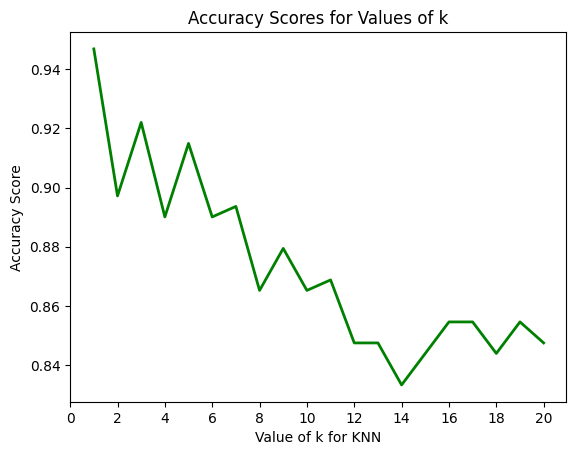

In [39]:
plt.plot(k_range, scores,c='g',linewidth=2)
plt.xlabel('Value of k for KNN')
plt.xticks([2 * i for i in range(11)])

plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k')
plt.show()

##Implement KNN

In [40]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)
y_p_train_knn=knn.predict(X_train)

##Performance of the model

####Classification Report

In [41]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       149
           1       0.97      0.86      0.91       133

    accuracy                           0.92       282
   macro avg       0.93      0.92      0.92       282
weighted avg       0.93      0.92      0.92       282



###Accuracy

In [42]:
print("Accuracy KNN Model for Train data:=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_knn)*100))
print("Accuracy KNN Model for Test data:=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_knn)*100))

Accuracy KNN Model for Train data:=> 97.87%
Accuracy KNN Model for Test data:=> 92.20%


##Recall

In [43]:
recall = recall_score(y_test,y_pred_knn)

print('Recall: ',recall)

Recall:  0.8646616541353384


###Confusion Matrix

In [44]:
confusion_mtx = confusion_matrix(y_test, y_pred_knn)
print(confusion_mtx)

[[145   4]
 [ 18 115]]


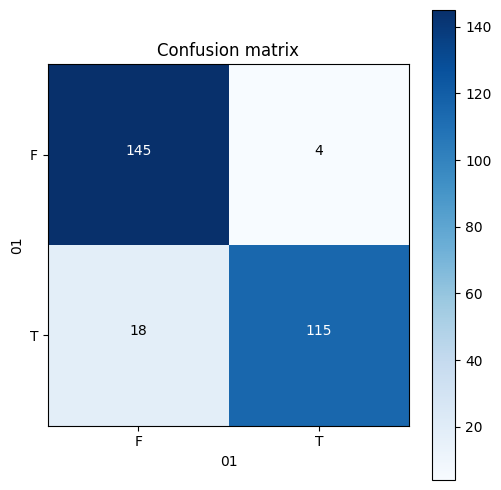

In [45]:
plot_confusion_matrix(confusion_mtx, "FT")

# SVM

In [46]:
from sklearn import svm

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# class_weight=None
class_weight='balanced'

models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
          svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
          svm.SVC(kernel='rbf', decision_function_shape='ovr', class_weight=class_weight),
          svm.SVC(kernel='poly', degree=3, decision_function_shape='ovr', class_weight=class_weight)
          )
models_fit = (clf.fit(X_train, y_train) for clf in models)
# title for the plots
titles = ('SVM with linear Kernel, One-vs-Rest',
          'SVM with linear Kernel, One-VS-One',
          'SVM with RBF Kernel, One-vs-Rest',
          'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')

##Performance of the model

In [47]:
scores=[]
for clf, title in zip(models_fit, titles):
    scores.append(clf.score(X_test, y_test))

print('Accuracy of SVM - linear - OVR:=> {:.2f} %'.format(scores[0]*100))
print('Accuracy of SVM - linear - OVO:=> {:.2f} %'.format(scores[1]*100))
print('Accuracy of SVM - RBF - OVR:=> {:.2f} %'.format(scores[2]*100))
print('Accuracy of SVM with polynomial (degree 3) Kernel, OVR:=> {:.2f} %'.format(scores[3]*100))

Accuracy of SVM - linear - OVR:=> 85.46 %
Accuracy of SVM - linear - OVO:=> 85.46 %
Accuracy of SVM - RBF - OVR:=> 89.72 %
Accuracy of SVM with polynomial (degree 3) Kernel, OVR:=> 85.11 %


###Confusion Matrix

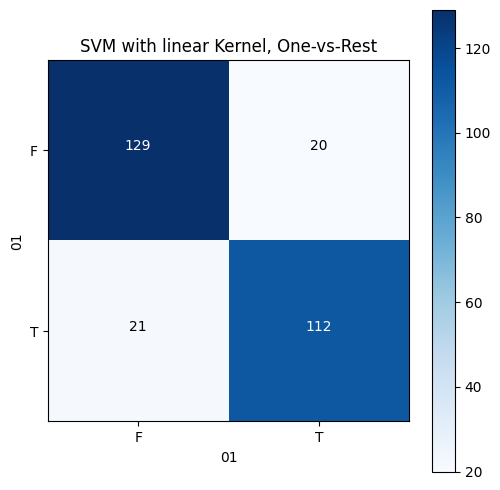

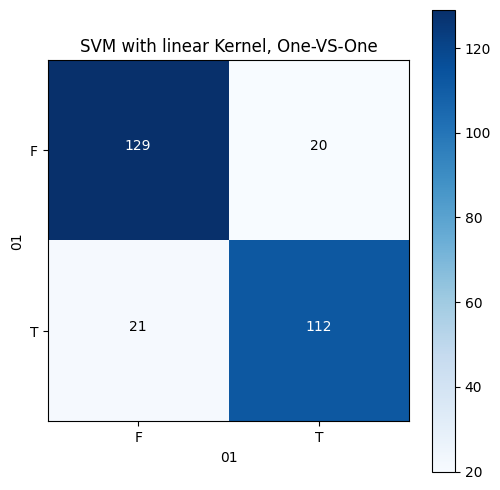

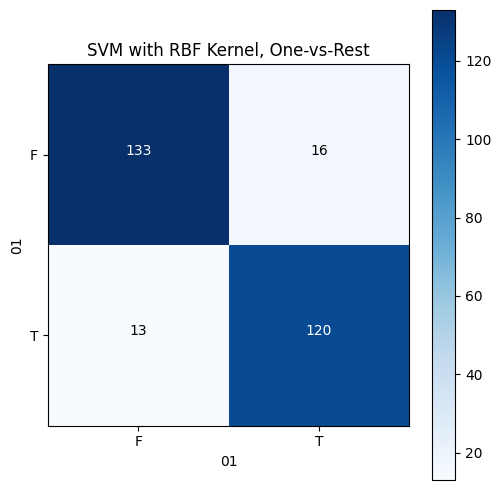

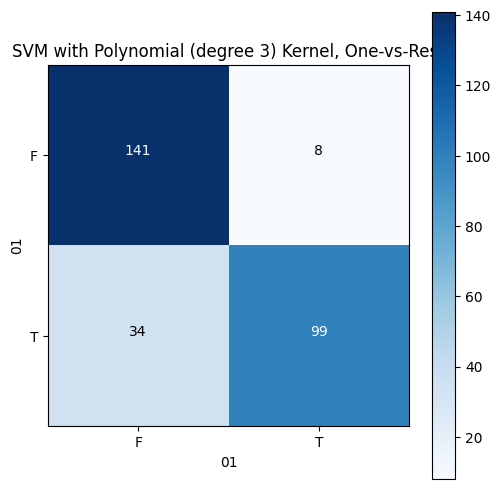

In [48]:
models_fit_mtx = (clf.fit(X_train, y_train) for clf in models)

plt.style.use('default')
for title, clf in zip(titles, models_fit_mtx):
    y_pred_svm = clf.predict(X_test)
    confusion_mtx = confusion_matrix(y_test, y_pred_svm)
    plot_confusion_matrix(confusion_mtx, "FT", title=title)


In [49]:
for clf, title in zip(models, titles):
  clf.fit(X_train, y_train)
  y_pred_svm = clf.predict(X_test)
  y_p_train_svm=clf.predict(X_train)
  print(classification_report(y_test, y_pred_svm))
  print("Train Accuracy "+title+" Model :=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_svm)*100))
  print("Test Accuracy "+title+" Model :=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_svm)*100))
  recall = recall_score(y_test,y_pred_svm)
  print('Recall: ',recall)
  print('&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&')

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       149
           1       0.85      0.84      0.85       133

    accuracy                           0.85       282
   macro avg       0.85      0.85      0.85       282
weighted avg       0.85      0.85      0.85       282

Train Accuracy SVM with linear Kernel, One-vs-Rest Model :=> 95.74%
Test Accuracy SVM with linear Kernel, One-vs-Rest Model :=> 85.46%
Recall:  0.8421052631578947
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       149
           1       0.85      0.84      0.85       133

    accuracy                           0.85       282
   macro avg       0.85      0.85      0.85       282
weighted avg       0.85      0.85      0.85       282

Train Accuracy SVM with linear Kernel, One-VS-One Model :=> 95.74%
Test Accuracy SVM with linear Kernel

# **Logistic Regression**



In [50]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=27, max_iter=1000)
# fitting the classifier
LR.fit(X_train, y_train)
y_pred_LR= LR.predict(X_test)
y_p_train_LR= LR.predict(X_train)

##Performance of the model

In [51]:

print("Accuracy LogisticRegression Model for Train Data:=> %.2f%%" % (metrics.accuracy_score(y_train, y_p_train_LR)*100))

print("Accuracy LogisticRegression Model for Test Data:=> %.2f%%" % (metrics.accuracy_score(y_test, y_pred_LR)*100))

print("--------------------------------------------------------")
recall = recall_score(y_test,y_pred_LR)
print('Recall: ',recall)

Accuracy LogisticRegression Model for Train Data:=> 93.50%
Accuracy LogisticRegression Model for Test Data:=> 85.11%
--------------------------------------------------------
Recall:  0.8646616541353384


In [52]:
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       149
           1       0.83      0.86      0.85       133

    accuracy                           0.85       282
   macro avg       0.85      0.85      0.85       282
weighted avg       0.85      0.85      0.85       282



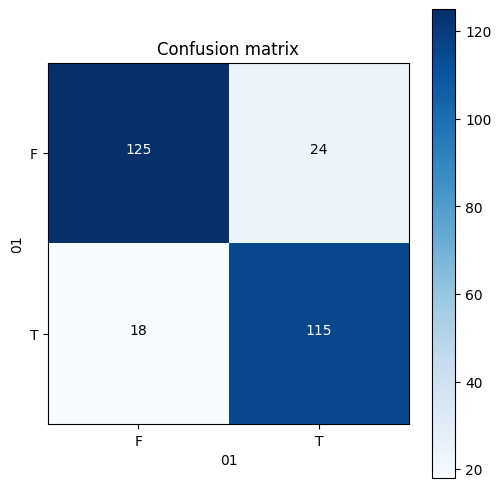

In [53]:
confusion_mtx = confusion_matrix(y_test, y_pred_LR)
plot_confusion_matrix(confusion_mtx, "FT")